In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from keras.layers import Input, Dense, Convolution2D, MaxPooling2D, UpSampling2D, Reshape, Flatten
from keras.models import Model
from IPython.display import SVG
from keras.utils.visualize_util import model_to_dot


#from PIL import Image 


Using TensorFlow backend.


(500, 500, 2)


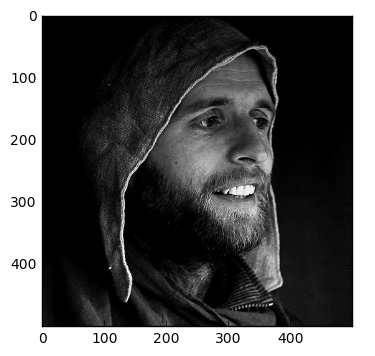

In [52]:
# image_file = Image.open("3372482944_244c25c45f.jpg") # open colour image

img = Image.open('3372482944_244c25c45f.jpg').convert('LA')
arr = np.array(img)
print(arr.shape)
plt.imshow(img)
plt.show()

# col = Image.open("3372482944_244c25c45f.jpg")
# print(col.size)
# gray = col.convert('1')
# print(gray.size)
# #image_file = image_file.convert('1') # convert image to black and white
# plt.imshow(gray)
# plt.show()

# col = Image.open("621496748594232834.jpg")
# gray = col.convert('1')
# print(gray.size)
# #image_file = image_file.convert('1') # convert image to black and white
# plt.imshow(gray)
# plt.show()

[[[ 0.          0.          0.        ]
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]
  ..., 
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]]

 [[ 0.          0.          0.        ]
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]
  ..., 
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]]

 [[ 0.          0.          0.        ]
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]
  ..., 
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]]

 ..., 
 [[ 0.23137255  0.02352941  0.00784314]
  [ 0.18039216  0.00784314  0.01568627]
  [ 0.01960784  0.00392157  0.        ]
  ..., 
  [ 0.20784314  0.00392157  0.        ]
  [ 0.16862745  0.          0.00784314]
  [ 0.18431373  0.          0.00784

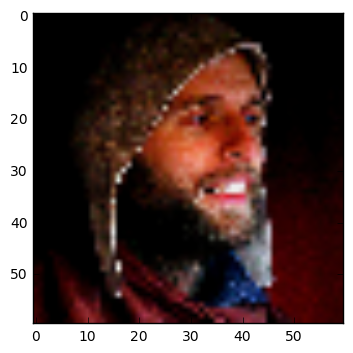

(500, 500, 3)
float64


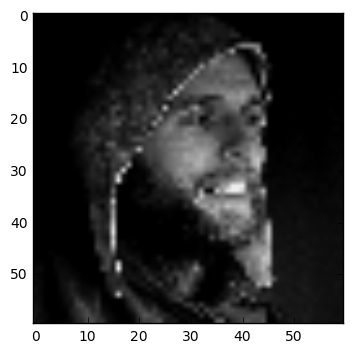

True

In [2]:
#621496748594232834  3372482944_244c25c45f
colorImg = cv2.imread('3372482944_244c25c45f.jpg', cv2.IMREAD_COLOR)
colorImg  = cv2.cvtColor(colorImg, cv2.COLOR_BGR2RGB)
colorImg = cv2.resize(colorImg, (60, 60)) 
colorImg = colorImg/255.0
print(colorImg)
plt.imshow(colorImg)
plt.show()



grayImg = cv2.imread('3372482944_244c25c45f.jpg', cv2.IMREAD_GRAYSCALE)
backtorgb = cv2.cvtColor(grayImg,cv2.COLOR_GRAY2RGB)
print(backtorgb.shape)
backtorgb = cv2.resize(backtorgb, (60, 60))/255.0
print(backtorgb.dtype)
plt.imshow(backtorgb)
plt.show()
cv2.imwrite('grey.jpg',backtorgb)


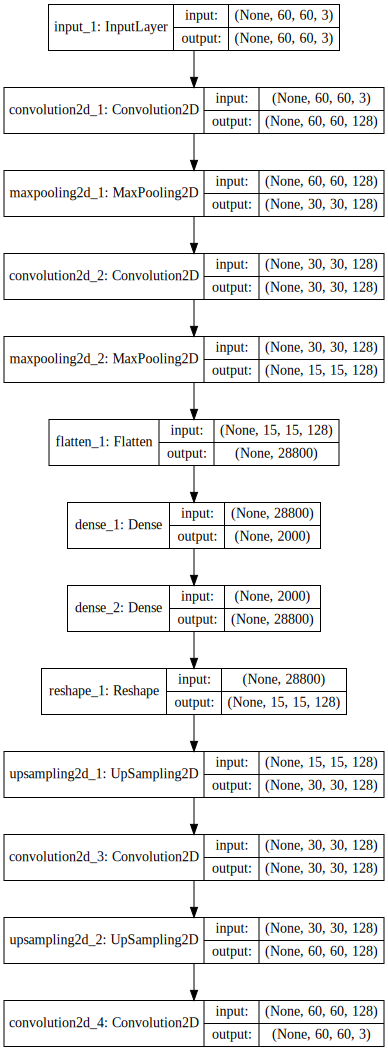

In [3]:
ROWS = 60
COLS = 60

input_img = Input(shape=(ROWS,COLS,3))
x = Convolution2D(128, 3, 3, activation='relu', border_mode='same')(input_img)
x = MaxPooling2D((2, 2), border_mode='same')(x)
x = Convolution2D(128, 3, 3, activation='relu', border_mode='same')(x)
x = MaxPooling2D((2, 2), border_mode='same')(x)
x = Flatten()(x)
encoded = Dense(2000)(x)
oneD = Dense(15*15*128)(encoded)
fold = Reshape((15,15,128))(oneD)
x = UpSampling2D((2, 2))(fold)
x = Convolution2D(128, 3, 3, activation='relu', border_mode='same')(x)
x = UpSampling2D((2, 2))(x)

decoded = Convolution2D(3, 3, 3, activation='sigmoid', border_mode='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
SVG(model_to_dot(autoencoder,show_shapes=True).create(prog='dot', format='svg'))

In [4]:
trainX =np.expand_dims(backtorgb, 0)
trainy =np.expand_dims(colorImg, 0)


In [5]:
autoencoder.fit(trainX, trainy,
                nb_epoch=500,
                batch_size=1,
                shuffle=True,
                verbose=2)

Epoch 1/500
1/1 [==============================] - 1s - loss: 0.6931
Epoch 2/500
1/1 [==============================] - 0s - loss: 0.6912
Epoch 3/500
1/1 [==============================] - 0s - loss: 0.6202
Epoch 4/500
1/1 [==============================] - 0s - loss: 0.3683
Epoch 5/500
1/1 [==============================] - 0s - loss: 0.3199
Epoch 6/500
1/1 [==============================] - 0s - loss: 0.2674
Epoch 7/500
1/1 [==============================] - 0s - loss: 0.2815
Epoch 8/500
1/1 [==============================] - 0s - loss: 0.2565
Epoch 9/500
1/1 [==============================] - 0s - loss: 0.2645
Epoch 10/500
1/1 [==============================] - 0s - loss: 0.2552
Epoch 11/500
1/1 [==============================] - 0s - loss: 0.2486
Epoch 12/500
1/1 [==============================] - 0s - loss: 0.2510
Epoch 13/500
1/1 [==============================] - 0s - loss: 0.2443
Epoch 14/500
1/1 [==============================] - 0s - loss: 0.2469
Epoch 15/500
1/1 [===========

In [144]:
autoencoder.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_21 (InputLayer)            (None, 500, 500, 3)   0                                            
____________________________________________________________________________________________________
convolution2d_133 (Convolution2D (None, 500, 500, 16)  448         input_21[0][0]                   
____________________________________________________________________________________________________
maxpooling2d_58 (MaxPooling2D)   (None, 250, 250, 16)  0           convolution2d_133[0][0]          
____________________________________________________________________________________________________
convolution2d_134 (Convolution2D (None, 250, 250, 8)   1160        maxpooling2d_58[0][0]            
___________________________________________________________________________________________

In [11]:
predict = autoencoder.predict(trainX)
%matplotlib inline

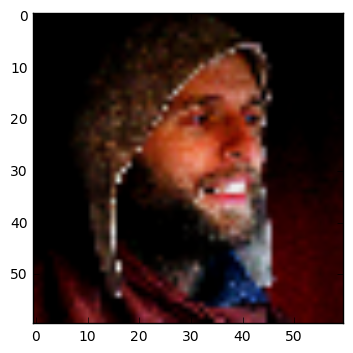

In [12]:
plt.imshow(predict[0].astype(float))

In [79]:
predict[0].astype(int)

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ..., 
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ..., 
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ..., 
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ..., 
       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ..., 
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ..., 
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ..., 
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]])

[[[ 0.          0.          0.        ]
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]
  ..., 
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]]

 [[ 0.          0.          0.        ]
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]
  ..., 
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]]

 [[ 0.          0.          0.        ]
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]
  ..., 
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]]

 ..., 
 [[ 0.23137255  0.02352941  0.00784314]
  [ 0.18039216  0.00784314  0.01568627]
  [ 0.01960784  0.00392157  0.        ]
  ..., 
  [ 0.20784314  0.00392157  0.        ]
  [ 0.16862745  0.          0.00784314]
  [ 0.18431373  0.          0.00784

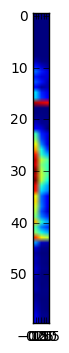

In [88]:

print(trainy[0].astype(float))
plt.imshow(trainy[0][30])